In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')



In [2]:
df=pd.read_csv('data\Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df=df.iloc[:,3:]
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_values = scaler.fit_transform(df.values)
df_scaled = pd.DataFrame(scaled_values, columns=df.columns)
df_scaled


,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,19):
    model = KMeans(n_clusters = i)
    model.fit(df)
    wcss.append(model.inertia_)
    
print("WCSS : \n",wcss)

WCSS : 
 [269981.28, 181363.595959596, 106348.37306211118, 73679.78903948836, 44448.45544793371, 37233.81451071001, 30273.394312070042, 25343.889125729344, 21797.084944646373, 19755.6198608334, 17636.64997270032, 15939.665443396116, 14582.12608518932, 12762.123258848995, 11917.337475742648, 10934.458423520922, 10202.098029911265, 9232.136718836719]


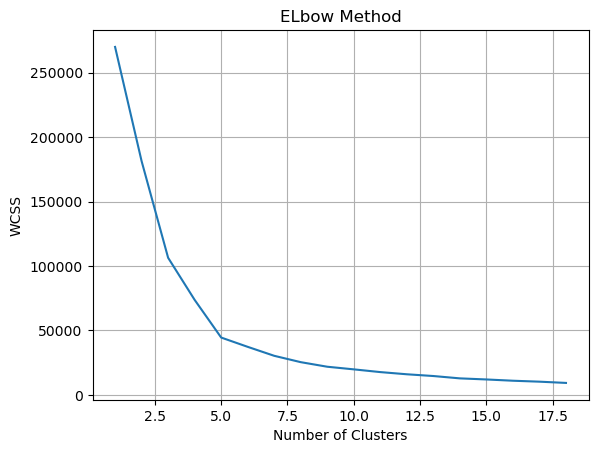

In [10]:
plt.plot(list(range(1,19)),wcss)
plt.title("ELbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid()

In [11]:

# Specify the number of clusters
k = 5

# Create an instance of KMeans
kmeans = KMeans(n_clusters=5)

# Fit the data to the model
kmeans.fit(df_scaled)

# Get the cluster labels
labels = kmeans.labels_

df_scaled['Cluster'] = labels    

# Print the dataframe with cluster labels
print(df_scaled)


     Annual Income (k$)  Spending Score (1-100)  Cluster
0             -1.738999               -0.434801        1
1             -1.738999                1.195704        3
2             -1.700830               -1.715913        1
3             -1.700830                1.040418        3
4             -1.662660               -0.395980        1
..                  ...                     ...      ...
195            2.268791                1.118061        4
196            2.497807               -0.861839        2
197            2.497807                0.923953        4
198            2.917671               -1.250054        2
199            2.917671                1.273347        4

[200 rows x 3 columns]


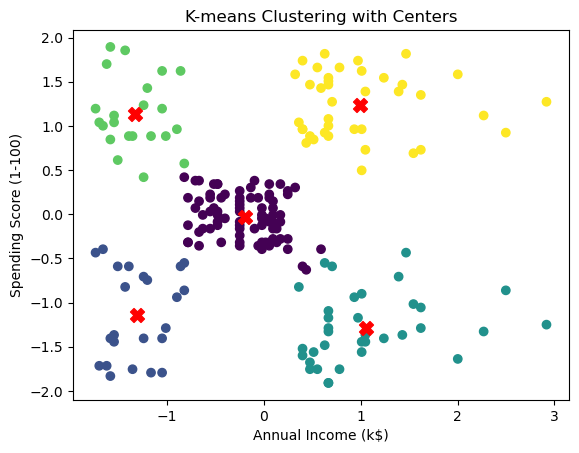

In [12]:


centers = kmeans.cluster_centers_

plt.scatter(df_scaled['Annual Income (k$)'], df_scaled['Spending Score (1-100)'], c=df_scaled['Cluster'], cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering with Centers')
plt.show()
